# Skriftlig innlevering 2, Oppgave 3-4 (av 4)

## Oppgave 3

Simultanfordelingen $f_{XY}(x,y)$ til to diskret fordelte stokastiske 
variabler $X$ og $Y$ er gitt ved følgende tabell.

  |       | $y=0$ | $y=1$ | $y=2$ | $y=3$ |
  |:-----:|:-----:|:-----:|:-----:|:-----:|
  | $x=0$ | $\frac{1}{18}$ | $\frac{1}{6}$ | $\frac{1}{18}$ | $\frac{1}{18}$ |
  | $x=1$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{6}$ | $\frac{1}{18}$ |
  | $x=2$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{6}$ |
  

  * Finn marginalfordelingen for $X$, dvs $f_X(x)$, og den betingede 
    fordelingen for $Y$ gitt $X$, dvs
    $f_{Y|X}(y|x)$.
  * Finn forventningsverdien for $X$, $E[X]$, og forventningsverdien 
    til $Y$, $E[Y]$.
  * Er $X$ og $Y$ uavhengige stokastiske variabler? Begrunn svaret.


## Oppgave 4

I denne oppgaven skal vi regne på tvunget yatzy, se spilleregler beskrevet på
  https://no.wikipedia.org/wiki/Yatzy. For å forenkle situasjonen skal vi i denne
  oppgaven ikke tillatte at man tar yatzy utenfor tur.

  Vi starter med å kaste for enere. Man kaster
  da fem terninger og tar vare på de terningene som viser et øye. De terningene som ikke viste
  et øye kaster  man på nytt. Igjen tar man vare på de terningene som viser et øye, og kaster
  de terningen som fremdeles ikke viste et øye en tredje gang. Man teller så opp hvor mange 
  terninger som endte opp med et øye, og dette er antall poeng vi får for enerne. 

  La oss nummerere de fem terningene fra terning 1 til terning 5, og la $A_i$ være hendelsen at vi ender
  opp med et øye på terning nummer $i$. Definer så de stokastiske variablene $Y_1,\ldots,Y_5$ ved
  å sette $Y_i=1$ hvis hendelsen $A_i$ skjer og $Y_i=0$ ellers. La så den stokastiske variabelen
  \begin{align*}
    X_1 = \sum_{i=1}^5 Y_i
  \end{align*}
  være antall terninger som ender opp med et øye.
  

## Deloppgave a)

* Hva er sannsynligheten for at vi ender opp med et øye på terning nummer $i$, $P(A_i)$?
* Finn $E[Y_i]$ og $\mbox{Var}[Y_i]$.
* Finn også $E[X_1]$ og $\mbox{Var}[X_1]$.

#### Her er deloppgave a) slutt.

I neste runde kaster vi tilsvarende for toere, i tredje runde kaster vi for treere og så videre opp
  til at vi kaster for seksere. La $X_2$ være <b>antall terninger</b> som ender opp med
  to øyne når vi kaster for toere, la $X_3$ være <b>antall terninger</b> som ender opp med
  tre øyne i runden hvor vi kaster for treere, og så tilsvarende videre opp til $X_6$. Antall
  poeng man får i løpet av de seks første rundene av tvingen yatzy er dermed
  \begin{align*}
  Z = \sum_{k=1}^6 kX_k = X_1+2X_2+3X_3+4X_4+5X_5+6X_6.
  \end{align*}

## Deloppgave b)

* Forklar hvorfor $X_1, X_2,\ldots,X_6$ må være uavhengige stokastiske variabler og at de alle må ha samme sannsynlighetsfordeling.
* Finn forventingsverdi og varians til $Z$. Regn også ut standardavviket til $Z$.

#### Her er deloppgave b) slutt

Hvis man i løpet av de første seks rundene av yatzy får minst $42$ poeng får man bonus.
  Over regnet du ut $E[Z]$ og $\mbox{SD}[Z]$. Det å regne ut sannsynligheten for bonus, $P(Z\geq 42)$,
  er ikke like enkelt. Men ved hjelp av stokastisk simulering kan man ganske enkelt finne en
  tilnærmet verdi for denne sannsynligheten.

## Deloppgave c)

* Skriv en pythonfunksjon som simulerer en av de seks første rundene i yatzy og returnerer antall terninger som ender opp med det ønskede antall øyne.
* Skriv en ny python-funksjon som ved å kalle den første python-funksjonen genererer $n$ realisasjoner av $Z$. Denne funksjonen må altså ha $n$ som input-parameter.
* Benytt den siste python-funksjonen til å generere (for eksempel) $n=10\ 000$ realisasjoner av $Z$ og lag et histogram av de genererte verdiene. Ut fra dette histogrammet, ser verdiene du fant for $E[Z]$ og $\mbox{SD}[Z]$ riktige ut?
* Benytt også de $n$ realisasjonene av $Z$ til å finne en tilnærmet verdi for $P(Z\geq 42)$.

44


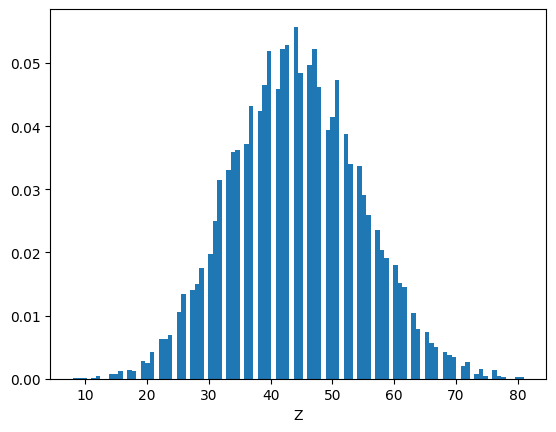

P(Z>=42): 0.5954


In [53]:
# Her kan du skrive din pythonkode.

import random as rand
import numpy as np
import matplotlib.pyplot as plt

def runYatzy():
    sum = 0
    for i in range(1,7): # 6 runder
        hits = 0
        for j in range(3): # 3 kast
            dices = np.random.randint(1,7,5-hits)
            #print(f"{dices}, eyes: {i}")
            for dice in dices:
                if dice == i:
                    sum += i
                    hits += 1
    return sum        

print(runYatzy())

def simYatzy(n):
    arr = np.zeros(n, dtype=int)
    for i in range(n):
        arr[i] = runYatzy()
    
    return arr
n = 10000
z = simYatzy(n)

plt.hist(z, density=True,bins=100)
plt.xlabel("Z")
plt.show()

# E[Z] ser rimlig ut

P_Zge42 = len(z[z>=42])/n

print(f"P(Z>=42): {P_Zge42}")


## Fasit:
* Oppgave 3: $E[X]=1, E[Y]=5/3$
* Oppgave 4a): $0.421, 0.421, 0.244, 2.11, 1.22$
* Oppgave 4b): $E[Z]=44.24, \mbox{Var}[Z]=110.9, \mbox{SD}[Z]=10.5$